In [1]:
# from IPython.core.display import HTML
# HTML("""
# <style>
# .prompt{display: none}
# .prompt_container{display: none;}
# .container{width: auto !important;}
# .btn { font-size: 9px; }
# #menubar { max-height: 2em; overflow: hidden;}
# </style>
# """)

## 🧊 🧊 🧊 🧊 🧊 🧊 🧊 🧊 🧊

## Happy Very Cold Day??

## 🧊 🧊 🧊 🧊 🧊 🧊 🧊 🧊 🧊

1. Do the **Do Now!**
2. Get on **Slack!**
3. Download and unzip `07-classwork.zip`
4. Create a new Jupyter notebook (in the same location as your 07-classwork content)

In [2]:
import pandas as pd

df = pd.read_csv("sales.csv")
df.shape

(6, 3)

In [3]:
# Let's take a little look to make sure 
# the data read in okay
df.head()

,month,product,sales
0,May,salad,55
1,May,coffee,20
2,June,salad,540
3,June,coffee,300
4,July,salad,23


In [4]:
# No one does this but sure you can
df.sample(n=5)

,month,product,sales
0,May,salad,55
3,June,coffee,300
2,June,salad,540
5,July,coffee,11
4,July,salad,23


In [5]:
df.dtypes

month      object
product    object
sales       int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   month    6 non-null      object
 1   product  6 non-null      object
 2   sales    6 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 272.0+ bytes


In [7]:
#%pip install --upgrade pandas

In [10]:
df.describe()

,sales
count,6.000000
mean,158.166667
std,217.059823
min,11.000000
25%,20.750000
50%,39.000000
75%,238.750000
max,540.000000


### How do I find the total sales for the year?

In [12]:
# dataframe!
# 1. filter?
# 2. group?
# 3. grab a column?
# 4. do some sort of aggregation?
df['sales'].sum()

949

### How do I display only the rows for June?

In [16]:
# dataframe!
# 1. filter?
# 2. group?
# 3. grab a column?
# 4. do some sort of aggregation?
df[df['month'] == 'June']

,month,product,sales
2,June,salad,540
3,June,coffee,300


In [17]:
df[(df['month'] == 'June')]

,month,product,sales
2,June,salad,540
3,June,coffee,300


In [18]:
df.query("month == 'June'")

,month,product,sales
2,June,salad,540
3,June,coffee,300


### How do I see only rows where sales are under 100 in the month of May?

In [23]:
# NO!
# df[df['sales'] < 100 and df['month'] == 'May']
df[(df['sales'] < 100) & (df['month'] == 'May')]

,month,product,sales
0,May,salad,55
1,May,coffee,20


In [25]:
df.query("sales < 100 and month == 'May'")

,month,product,sales
0,May,salad,55
1,May,coffee,20


## Add a new column for year. It should be 2006 for each row.

In [33]:
# this seems more readable but is not
# flexible and lends itself to errors :(
# df.month
# so instead, we always do this ugly thing
# df['month']

In [32]:
df['year'] = 2006
df.head()

,month,product,sales,year
0,May,salad,55,2006
1,May,coffee,20,2006
2,June,salad,540,2006
3,June,coffee,300,2006
4,July,salad,23,2006


### How do I find the month of the year where our shop made the most money?

|month|sales|
|---|---|
|May|123|
|June|498|
|July|984|

In [42]:
# "computational thinking"
df.groupby('month')['sales'].sum().sort_values(ascending=False)

month
June    840
May      75
July     34
Name: sales, dtype: int64

In [44]:
(
    df
    .groupby('month')['sales']
    .sum()
    .sort_values(ascending=False)
    .to_frame()
)

,sales
month,
June,840
May,75
July,34


In [45]:
(
    df
    .groupby('month')['sales']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

,month,sales
0,June,840
1,May,75
2,July,34


### How do I make a bar chart of coffee sales over the entire year?

In [ ]:
df[df['product'] == 'coffee'].plot(x='month', y='sales', kind='bar')

<Axes: xlabel='month'>

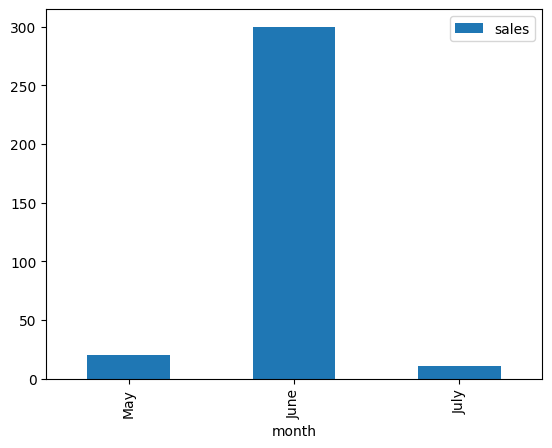

In [51]:
# Maybe it's easier if you break it down
# into multiple steps visually
(
    df
    [df['product'] == 'coffee']
    .plot(x='month', y='sales', kind='bar')
)

<Axes: xlabel='month'>

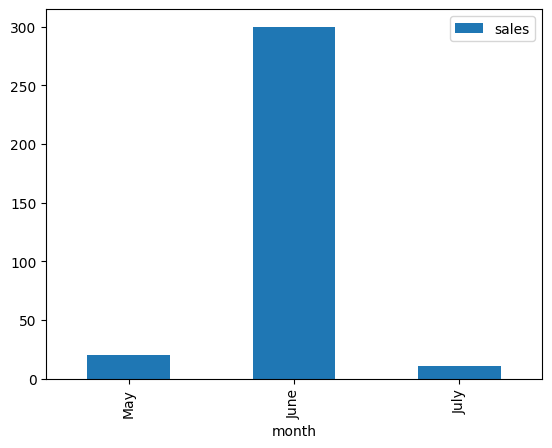

In [52]:
df[
    df['product'] == 'coffee'
].plot(
    x='month',
    y='sales',
    kind='bar'
)

<Axes: xlabel='month'>

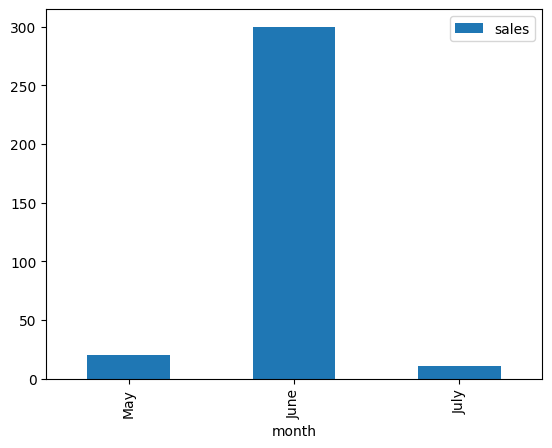

In [49]:
# dataframe!
# 1. filter?
# 2. group?
# 3. grab a column?
# 4. do some sort of aggregation?
(
    df
    [df['product'] == 'coffee']
    .plot(x='month', y='sales', kind='bar')
)

### I want to know whether salad or coffee usually makes me more money. How do I do that?

|product|median (or mean?) sales|
|---|---|
|salad|12|
|coffee|24|

In [54]:
df.groupby('product')['sales'].median()

product
coffee    20.0
salad     55.0
Name: sales, dtype: float64

In [57]:
df.groupby('product')['sales'].mean().reset_index()

,product,sales
0,coffee,110.333333
1,salad,206.000000


In [60]:
df[df['product'] == 'coffee']['sales'].mean()

110.33333333333333

In [61]:
df[df['product'] == 'salad']['sales'].mean()

206.0

<Axes: xlabel='month', ylabel='sales'>

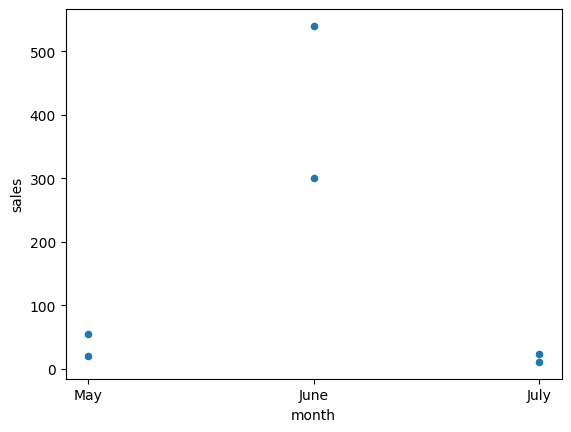

In [63]:
df.plot(kind='scatter', x='month', y='sales')

<Axes: xlabel='month', ylabel='sales'>

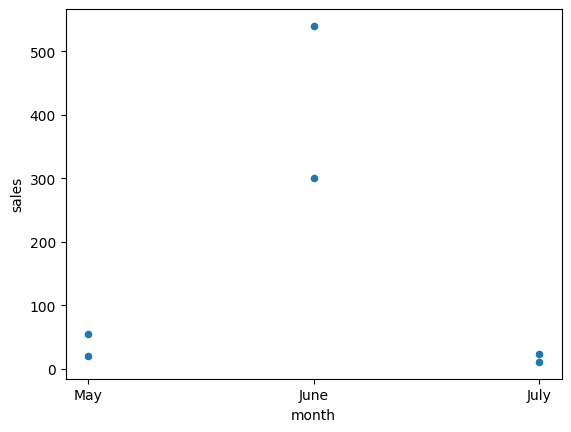

In [64]:
# matplotlib = sucks
df.plot.scatter(x='month', y='sales')

In [56]:
df.groupby('product')['sales'].describe()

,count,mean,std,min,25%,50%,75%,max
product,,,,,,,,
coffee,3.0,110.333333,164.317782,11.0,15.5,20.0,160.0,300.0
salad,3.0,206.000000,289.694667,23.0,39.0,55.0,297.5,540.0
